In [2]:
import matplotlib.pyplot as plt
import numpy as np

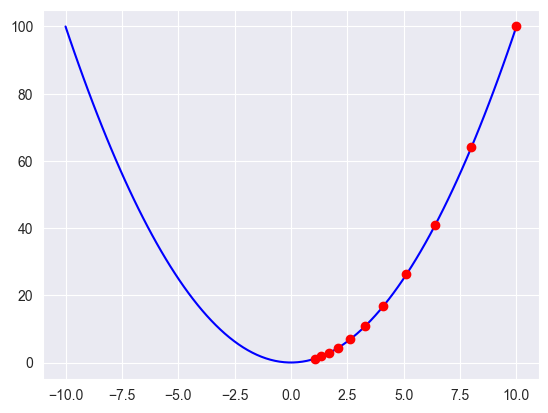

In [48]:
def func(x):
    return x ** 2


def func_deriv(x):
    return 2 * x


z = np.linspace(-10, 10, 100)
plt.plot(z, func(z), color="blue")

# init_values
x = 10
memory = np.array([x])
for _ in range(10):
    x -= 0.1 * func_deriv(x)
    memory = np.append(memory, x)

plt.plot(memory, func(memory), 'ro')

k = -0.1958853764027383, b = -3.48445260440402, error = 0.061855673907895176


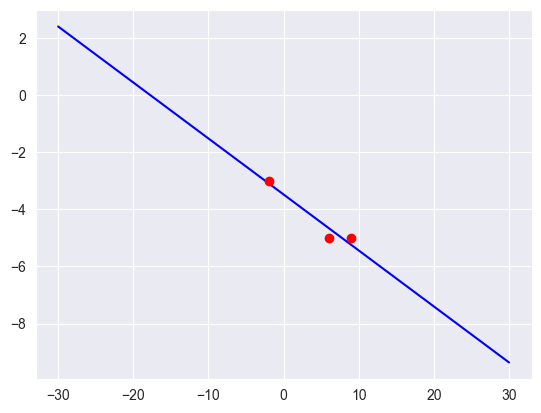

In [45]:
X = np.random.randint(-10, 10, 3)
Y = np.random.randint(-5, 5, 3)

k = 0
b = 0

alpha = 0.01  # скорость спуска по градиенту
epochs = 1000  # Количество интерпций прохождения по всем данным т.е. сколько раз модель "увидит" данные, спрогнозирует и исправит свои параметры в соответсвии с ошибкой
error = 0  # значение MSE

n = float(len(X))  # Число элементов в выборке

# F = (y_pred - y)^2 / N, где y_pred = k * x + b, те F = (k * x + b - y)^2 / N - MSE

# Выполняем шаги градиентного спуска
for i in range(epochs):
    Y_pred = k * X + b  # Текущее предсказание вектора Y
    D_k = (2 / n) * sum(X * (Y_pred - Y))  # Производная функции потерь по w1
    D_b = (2 / n) * sum(Y_pred - Y)  # Производная функции потерь по w0
    k = k - alpha * D_k  # Обновляем w1 по направлению минус градиента
    b = b - alpha * D_b  # Обновляем w0 по направлению минус градиента

    error = sum((Y_pred - Y) ** 2) / n

print(f'k = {k}, b = {b}, error = {error}')

x = np.linspace(-30, 30, 100)
plt.plot(x, k * x + b, color="blue")
plt.plot(X, Y, 'or')

<Axes: xlabel='X', ylabel='Y'>

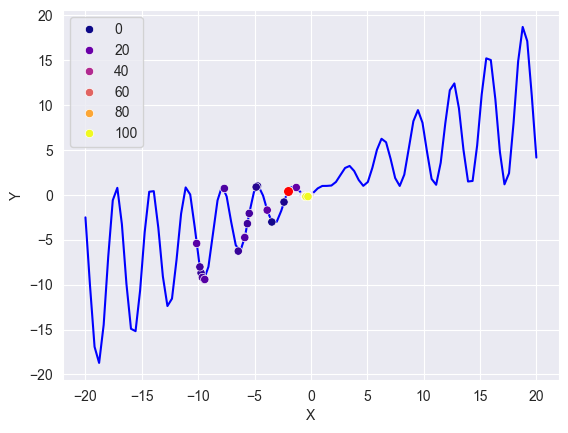

In [46]:
def func(x):
    return np.sin(x) ** 2 + x * np.cos(x) ** 2


def func_deriv(x):
    return 2 * np.sin(x) * np.cos(x) + np.cos(x) ** 2 - 2 * np.cos(x) * x * np.sin(x)


z = np.linspace(-20, 20, 100)
plt.plot(z, func(z), color="blue")

# init_values
x = -2
memory = np.array([x])
for _ in range(100):
    x -= 0.6 * func_deriv(x)
    memory = np.append(memory, x)

data = pd.DataFrame({'X': memory, 'Y': func(memory), 'Point': np.arange(0, 100 + 1)})
sns.scatterplot(data=data, x='X', y='Y', hue='Point', palette='plasma', zorder=2)
sns.scatterplot(x=[data.iloc[0, :]['X']], y=[data.iloc[0, :]['Y']], color='red', zorder=3, s=50)

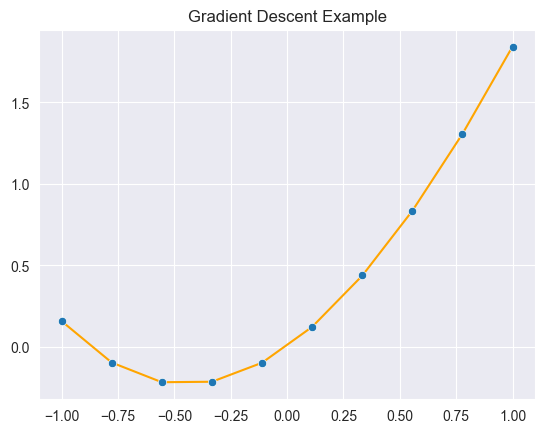

In [6]:
def func(x):
    return x ** 2 + np.sin(x)


X = np.linspace(-1, 1, 10)
Y = func(X)

a, b, c, d = 1, 1, 1, 1
alpha = 0.01

n_iter = 10000
for _ in range(n_iter):
    y_pred = a * X ** 3 + b * X ** 2 + c * X + d

    a_der = 2 * np.mean((y_pred - Y) * X ** 3)
    b_der = 2 * np.mean((y_pred - Y) * X ** 2)
    c_der = 2 * np.mean((y_pred - Y) * X)
    d_der = 2 * np.mean(y_pred - Y)

    a -= a_der * alpha
    b -= b_der * alpha
    c -= c_der * alpha
    d -= d_der * alpha

plt.title(f"Gradient Descent Example")
sns.scatterplot(x=X, y=Y, zorder=2)
sns.lineplot(x=X, y=a * X ** 3 + b * X ** 2 + c * X + d, zorder=1, color='orange')
plt.show()